                     Team  Win% Rank  Avg. SLG (2021-2025) Rank  \
0     Los Angeles Dodgers          1                          1   
1        New York Yankees          4                          2   
2          Atlanta Braves          5                          3   
3          Houston Astros          2                          4   
4       Toronto Blue Jays          9                          5   
5   Philadelphia Phillies          6                          6   
6          Boston Red Sox         14                          7   
7    Arizona Diamondbacks         19                          8   
8        San Diego Padres         10                          9   
9           New York Mets         13                         10   
10       Seattle Mariners          7                         11   
11   San Francisco Giants         12                         12   
12        Minnesota Twins         18                         13   
13      Milwaukee Brewers          3                         1

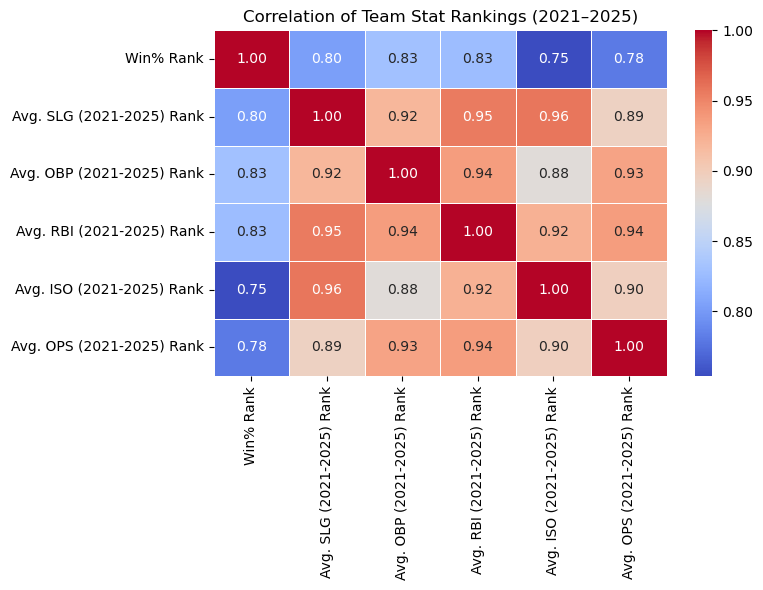

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Read the CSV 
df = pd.read_csv("MLB team stats 2021-2025.csv")

# 2. Choose the numeric stat columns we want to rank
stat_cols = [
    "Win%",
    "Avg. SLG (2021-2025)",
    "Avg. OBP (2021-2025)",
    "Avg. RBI (2021-2025)",
    "Avg. ISO (2021-2025)",
    "Avg. OPS (2021-2025)"
]

# 3. Create rank columns for each stat (1 = highest, 30 = lowest)
for col in stat_cols:
    rank_col = col + " Rank"
    df[rank_col] = df[col].rank(ascending=False, method="min").astype(int)

# look at the ranked table
print(df[["Team"] + [c + " Rank" for c in stat_cols]])

# 4. Build correlation matrix using ONLY the rank columns
rank_cols = [c + " Rank" for c in stat_cols]
corr_matrix = df[rank_cols].corr()

print("\nCorrelation matrix of rankings:")
print(corr_matrix)

# 5. Plot heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    linewidths=0.5,
    fmt=".2f"
)
plt.title("Correlation of Team Stat Rankings (2021–2025)")
plt.tight_layout()
plt.show()


Heatmap

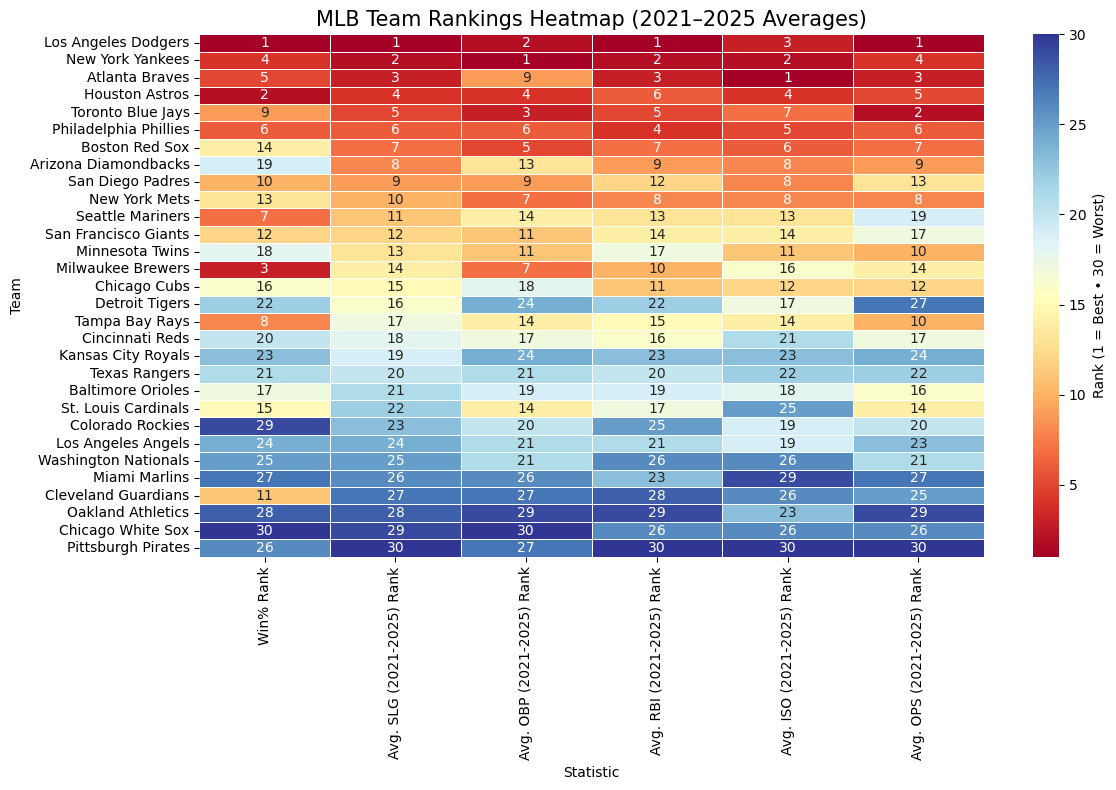

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the MLB data file
df = pd.read_csv("MLB team stats 2021-2025.csv")

# Stats we want to rank
stat_cols = [
    "Win%",
    "Avg. SLG (2021-2025)",
    "Avg. OBP (2021-2025)",
    "Avg. RBI (2021-2025)",
    "Avg. ISO (2021-2025)",
    "Avg. OPS (2021-2025)"
]

# Rank each stat (1 = best, 30 = worst)
for col in stat_cols:
    df[col + " Rank"] = df[col].rank(ascending=False, method="min").astype(int)

# Create DataFrame with only the ranks
rank_cols = [col + " Rank" for col in stat_cols]
rank_df = df.set_index("Team")[rank_cols]

# Heatmap (red = best, blue = worst)
plt.figure(figsize=(12, 8))
sns.heatmap(
    rank_df,
    cmap="RdYlBu",      # not reversed → rank 1 = red, rank 30 = blue
    annot=True,
    fmt="d",
    linewidths=0.5,
    vmin=1,
    vmax=30,
    cbar_kws={"label": "Rank (1 = Best • 30 = Worst)"}
)

plt.title("MLB Team Rankings Heatmap (2021–2025 Averages)", fontsize=15)
plt.ylabel("Team")
plt.xlabel("Statistic")
plt.tight_layout()
plt.show()
